<a href="https://colab.research.google.com/github/JMML2021/0401_Registre-de-logs/blob/main/Registre_de_logs_2_parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
# importing libraries
from urllib.request import urlretrieve
import pandas as pd
import os
import re
from datetime import datetime
import pytz
import geocoder
import folium
import time
import urllib.request
import json
import geopandas
import matplotlib.pyplot as plt
from datetime import datetime

In [126]:
#!conda --version # now returns 4.8.3

In [127]:
#!pip install geopandas

In [128]:
#!pip install geopandas

In [129]:
#!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [130]:
#!pip install geocoder


In [131]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
# Abro el fichero una vez adecuado

path = ('/content/drive/MyDrive/01_COLAB/' +'direcionesIP_copa.csv')
df=  pd.read_csv(path)

In [228]:
df.dtypes

Unnamed: 0        int64
virtual_host     object
IPs              object
Fecha            object
request          object
status           object
size             object
referer          object
user_agent      float64
dtype: object

In [229]:
data_ip =df["IPs"].value_counts().rename_axis('ip').reset_index(name="visits")
data_ip.head()

,ip,visits
0,66.249.76.216,1022
1,162.243.192.191,73
2,157.55.33.97,24
3,127.0.0.1,21
4,192.81.215.7,20


In [241]:
data_ip2 = df.copy()
data_ip2= data_ip.groupby('IPs').count()


 

KeyError: ignored

In [234]:
data_ip2.head()

,Unnamed: 0,virtual_host,Fecha,request,status,size,referer,user_agent
IPs,,,,,,,,
127.0.0.1,21,21,21,21,21,21,21,0
131.253.24.3,2,2,2,2,2,2,2,0
157.55.32.183,12,12,12,12,12,12,12,0
157.55.32.88,1,1,1,1,1,1,1,0
157.55.33.26,1,1,1,1,1,1,1,0


In [235]:
data_ip2.shape

(73, 8)

In [212]:
import geocoder
ip = geocoder.ip("180.76.5.223")
print(ip.city)
print(ip)
print(ip.latlng)

Tokyo
<[OK] Ipinfo - Geocode [Tokyo, Tokyo, JP]>
[35.6895, 139.6917]


In [246]:
# Trato el tema de las IP para saber la localizacion
# creo una lista con un dicionario dentro
data1 = []

for index, value in data_ip["ip"].items():
    with urllib.request.urlopen("https://geolocation-db.com/jsonp/"+value,timeout=500) as url:
                #print(index, data_ip['visits'][1])
                data = url.read().decode()
                data = data.split("(")[1].strip(")")
                data = json.loads(data)
                data1.append(data)

In [250]:
# Me he quitado la linea que tiene ' NO Values'
data1= data1[2:]

In [291]:
localidades = geolocal['country_name']
localidades = geolocal.set_index('country_name')
localidades.head(3)

,country_code,city,postal,latitude,longitude,IPv4,state,geometry
country_name,,,,,,,,
United States,US,None,None,47.6062,-122.3321,157.55.33.97,Washington,POINT (-122.33210 47.60620)
United States,US,North Bergen,07047,40.7939,-74.0258,192.81.215.7,New Jersey,POINT (-74.02580 40.79390)
United States,US,None,None,47.6062,-122.3321,157.55.35.112,Washington,POINT (-122.33210 47.60620)


In [300]:
pto_Inicial = [[localidades['longitude'], localidades['latitude']]]
pto_Inicial

[[country_name
  United States   -122.3321
  United States    -74.0258
  United States   -122.3321
  United States   -122.3321
  United States    -96.8217
                     ...   
  NaN                     8
  China            116.3883
  United States   -122.3321
  China            116.3883
  China            116.3883
  Name: longitude, Length: 70, dtype: object, country_name
  United States    47.6062
  United States    40.7939
  United States    47.6062
  United States    47.6062
  United States    32.7787
                    ...   
  NaN                   47
  China            39.9289
  United States    47.6062
  China            39.9289
  China            39.9289
  Name: latitude, Length: 70, dtype: object]]

In [251]:
# Lo paso a DataFrame:

geolocal = pd.DataFrame(data1)
geolocal[:3]

,country_code,country_name,city,postal,latitude,longitude,IPv4,state
0,US,United States,None,None,47.6062,-122.3321,157.55.33.97,Washington
1,Not found,Not found,Not found,Not found,Not found,Not found,IP Not found,Not found
2,US,United States,North Bergen,07047,40.7939,-74.0258,192.81.215.7,New Jersey


In [200]:
geolocal["visit"] = data_ip["visits"]
geolocal["visit"][:3]

0    415
1     21
2      7
Name: visit, dtype: int64

In [252]:
geolocal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  69 non-null     object
 1   country_name  69 non-null     object
 2   city          18 non-null     object
 3   postal        18 non-null     object
 4   latitude      71 non-null     object
 5   longitude     71 non-null     object
 6   IPv4          71 non-null     object
 7   state         67 non-null     object
dtypes: object(8)
memory usage: 4.6+ KB


In [253]:
print(geolocal['latitude'][:3][0],geolocal['latitude'][:3][1],geolocal['latitude'][:3][2])
a=geolocal['latitude'][0]
print(a)
type(a)

47.6062 Not found 40.7939
47.6062


float

In [256]:
# Elimina todos las Ip sin informacion de latitud y Longitud
geolocal = geolocal[geolocal['latitude']>0]

In [257]:
geolocal['latitude']

0     47.6062
2     40.7939
3     47.6062
4     47.6062
5     32.7787
       ...   
66         47
67    39.9289
68    47.6062
69    39.9289
70    39.9289
Name: latitude, Length: 70, dtype: object

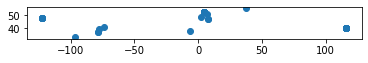

In [258]:
gdf = geopandas.GeoDataFrame(geolocal, geometry=geopandas.points_from_xy(geolocal['longitude'],geolocal['latitude']))
gdf.plot()

In [281]:
print(gdf.head(1))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

   BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


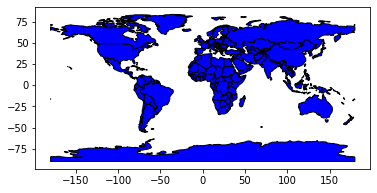

In [282]:
 world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(color='blue', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
#gdf.plot(ax=ax, color='red')

plt.show()

In [271]:
#location = ip.latlng


      location=[geolocal.iloc[i]["latitude"],geolocal.iloc[i]["longitude"]] #,location=[geolocal['longitude'],geolocal['latitude']]


In [259]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [260]:
import geopandas

path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


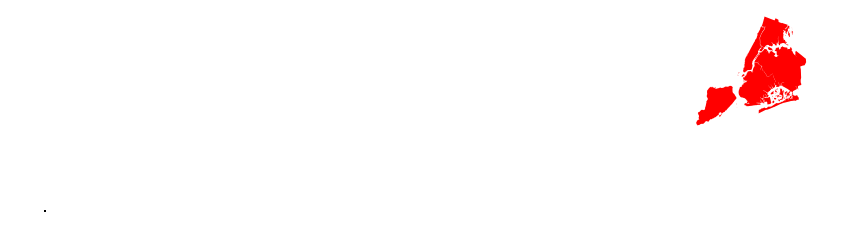

In [261]:
fig, ax = plt.subplots(figsize=(15,20))

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
ax.set_axis_off()

gdf.plot(ax=ax, marker='o', color='red', markersize=5)
#plt.show()

In [262]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.965, -5.664], zoom_start=4)
mc = MarkerCluster()

In [263]:
for i in range(0,len(geolocal)):
    mc.add_child(folium.Marker(
        location=[geolocal.iloc[i]["latitude"],geolocal.iloc[i]["longitude"]],

        popup=geolocal.iloc[i]["IPv4"],))
    
        #folium.Circle(location=[geolocal.iloc[i]["latitude"],geolocal.iloc[i]["longitude"]],   color='Red', fill=True, fill_color='Red',
              # radius=int(popup=geolocal.iloc[i]["IPv4"]) * 30).add_to(m)
m.add_child(mc)
 

In [160]:
geolocal.iloc[3]

country_code                         ES
country_name                      Spain
city                            Seville
postal                            41001
latitude                        37.3824
longitude                       -5.9761
IPv4                        217.12.28.5
state                           Seville
visit                                 6
geometry        POINT (-5.9761 37.3824)
Name: 3, dtype: object